In [1]:
# import modules
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.util import random_noise
import matplotlib.pyplot as plt
import os
import random
import numpy as np

In [2]:
def salt_pepper_noise(img): 
    ''' Add salt & pepper noise to image. Used as callback for ImageDataGenerator.
    '''
    noise_img = random_noise(img.astype(np.uint8), mode='s&p', amount=random.uniform(0, 0.01))
    return noise_img*255

In [4]:
def plot_images_on_grid(data, n_rows=1, n_cols=5): 
    ''' Plot max n_rows x n_cols images on a grid from a list.
    '''
    images, labels = data
    assert images.shape[0] <= n_rows*n_cols, "Too many images to plot!" 
    figsize = (n_rows*4,n_cols*4)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
        
    for ix, ax in enumerate(axes.reshape(-1)):
        if ix < images.shape[0]:
            ax.imshow(images[ix].astype(np.uint8), vmin=0, vmax=255)
            ax.axis('off')
            ax.set_title(f'Class: {np.argmax(labels[ix])}')        
    fig.tight_layout(pad=0.0)

In [5]:
# define folders
src_folder = r"C:/Users/rtaormina/Dropbox/Werk/RESEARCH/Andre_s_paper/plastic_datasets/train_27m_0deg_center_bank/"
dst_folder = r"C:/Users/rtaormina/Dropbox/Werk/RESEARCH/Andre_s_paper/plastic_datasets/train_27m_0deg_center_bank_aug_resized_temp/"

# define target image size and total number of images to create
IMAGE_SIZE = 224

In [6]:
# get labels & n_images
labels = os.listdir(src_folder)
d_nimgs = {}
for label in labels:    
    d_nimgs[label] = len(os.listdir(src_folder+label))
    print(f'{label}: num. images = {d_nimgs[label]}')

0 - No Plastic: num. images = 635
1 - Little Plastic: num. images = 941
2 - Moderate Plastic: num. images = 1360
3 - Lot Plastic: num. images = 1069


In [7]:
# create generator
generator = ImageDataGenerator(
    rotation_range=0,
    brightness_range=[0.6,1.4],    
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=salt_pepper_noise,
    data_format=None,
    validation_split=0.0,
    dtype=None
)

Found 4005 images belonging to 4 classes.


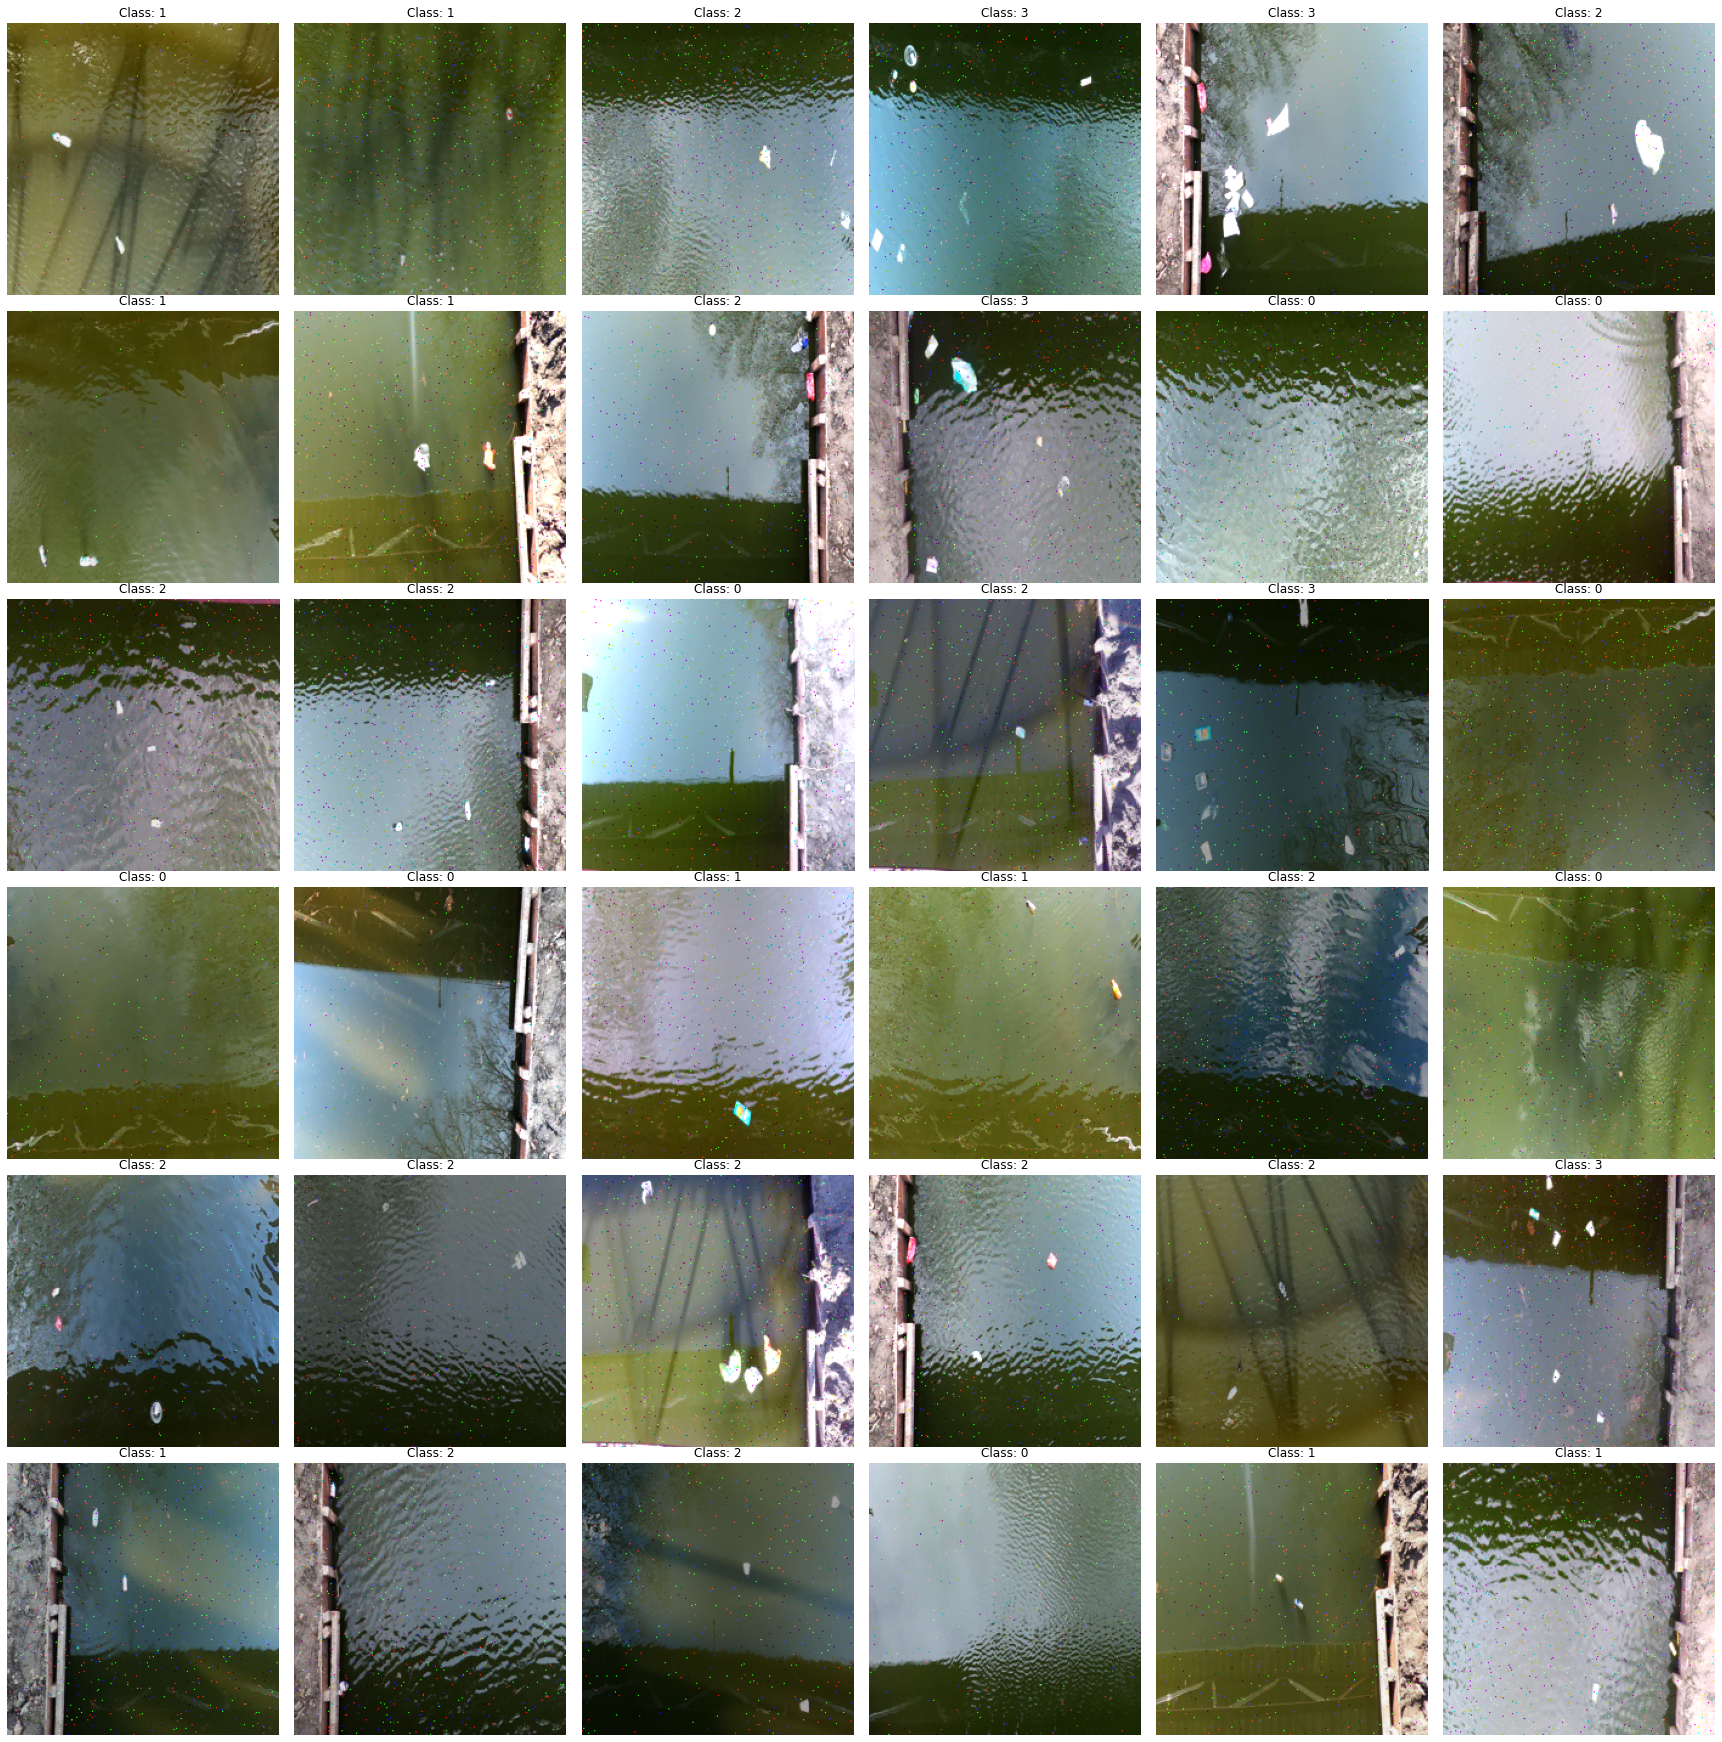

In [8]:
# plot examples
dataflow_kwargs = dict(target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                       batch_size=36, interpolation="bilinear")
    
temp = next(generator.flow_from_directory(src_folder, shuffle=True, seed=42, **dataflow_kwargs))

plot_images_on_grid(temp, n_rows=6, n_cols=6)

In [9]:
# check if destination folder exists
if os.path.exists(dst_folder):                
    raise IOError('Folder exists!')
else:    
    # creating folders
    print(f'Creating folder {dst_folder} and subfolders')
    os.makedirs(f'{dst_folder}')            
    for label in labels:
        os.makedirs(f'{dst_folder+label}')            

for label in labels:
    # datagen_kwargs = dict(rescale=1./255)  
    dataflow_kwargs = dict(target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                           batch_size=d_nimgs[label]*4, interpolation="bilinear")
    
    train_generator = next(generator.flow_from_directory(
      src_folder, shuffle=True, save_to_dir=dst_folder+label, classes=[label], **dataflow_kwargs))             

Creating folder C:/Users/rtaormina/Dropbox/Werk/RESEARCH/Andre_s_paper/plastic_datasets/train_27m_0deg_center_bank_aug_resized_temp/ and subfolders
Found 635 images belonging to 1 classes.
Found 941 images belonging to 1 classes.
Found 1360 images belonging to 1 classes.
Found 1069 images belonging to 1 classes.
